In [ ]:
# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score

# Classifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load locally stored data
df = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)

# Check first 5 values 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-14,237.179993,237.240005,236.190002,236.899994,216.819153,59880800
2017-03-15,237.559998,239.440002,237.289993,238.949997,218.695419,96081800
2017-03-16,239.110001,239.199997,238.100006,238.479996,218.265228,78344000
2017-03-17,237.750000,237.970001,237.029999,237.029999,217.881943,89002100
2017-03-20,237.029999,237.360001,236.320007,236.770004,217.642929,52537000


In [ ]:
# Descriptive statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,319.756839,321.470516,317.823519,319.755941,308.870896,8.419290e+07
std,68.898459,69.214256,68.499065,68.889126,74.415769,4.610067e+07
min,228.190002,229.679993,218.259995,222.949997,213.727097,2.027000e+07
25%,269.485001,271.579987,267.740006,269.989990,253.578606,5.531695e+07
50%,291.720001,293.239990,290.609985,292.230011,279.854401,7.125840e+07
75%,367.360000,369.309998,365.214996,367.044998,361.448410,9.741945e+07
max,479.220001,479.980011,476.059998,477.709991,477.709991,3.922207e+08


In [ ]:
# Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Features are also known as an independent variable which are used to determine the value of the target variable. 
#We will use the absolute change between Open-Close price and High-Low price as predictors.

In [ ]:
# Predictors
df['O-C'] = df['Open'] - df['Close']
df['H-L'] = df['High'] - df['Low']

X = df[['O-C', 'H-L']].values
X[:5]

array([[ 0.279999,  1.050003],
       [-1.389999,  2.150009],
       [ 0.630005,  1.099991],
       [ 0.720001,  0.940002],
       [ 0.259995,  1.039994]])

In [ ]:
X.shape 
# Predictors should be of 2D

(1259, 2)

In [ ]:
#Define labels
# Target
y = np.where(df['Adj Close'].shift(-1)>0.995*df['Adj Close'],1,-1) 
y

array([ 1,  1,  1, ...,  1, -1, -1])

In [ ]:
y.shape  
# Target Label should be 1D

(1259,)

In [ ]:
# Splitting the datasets into training and testing data.
# Always keep shuffle = False for financial time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 1007, 252


In [ ]:
#Fit model. Scaling
#Since the KNN model calculates distances, the dataset needs to be scaled for the model to work properly. 
#All the features should have a similar scale. The scaling can be accomplished by using the MinMaxScaler transformer.

In [ ]:
# Scale and fit the model
pipe = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("classifier", KNeighborsClassifier())
]) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
# Target classes
class_names = pipe.classes_
class_names

array([-1,  1])

In [ ]:
#Predict classes
# Predicting the test dataset
y_pred = pipe.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, pipe.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.8352, Test Accuracy: 0.7143


In [ ]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

10 48 24 170


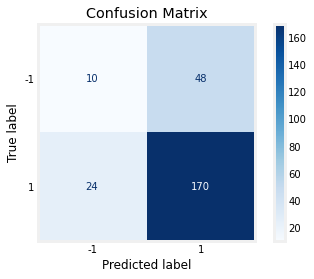

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)